<a href="https://colab.research.google.com/github/wcrowley342/bookanalysis/blob/main/Book_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I'd like to read more fiction; how do i use data to inform which book I pick up next?

# Intro & Read in Data

In [1]:

# Some basic, common libraries used:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from matplotlib import rcParams
import seaborn as sns
import plotly as py
import plotly.express as px

#Read in data into "titles" data frame

titles_df = pd.read_csv('https://raw.githubusercontent.com/wcrowley342/bookanalysis/main/titles.csv')

In [2]:
titles_df.head()

,id,title,author,year,total_weeks,first_week,debut_rank,best_rank
0,0,"""H"" IS FOR HOMICIDE",Sue Grafton,1991,15,1991-05-05,15,2
1,1,"""I"" IS FOR INNOCENT",Sue Grafton,1992,11,1992-04-26,2,2
2,10,''G'' IS FOR GUMSHOE,Sue Grafton,1990,6,1990-05-06,8,8
3,100,A DOG'S JOURNEY,W. Bruce Cameron,2012,1,2012-05-27,14,14
4,1000,CHANGING FACES,Kimberla Lawson Roby,2006,1,2006-02-19,14,14


In [3]:
titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7431 entries, 0 to 7430
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0    id          7431 non-null   int64 
 1   title        7431 non-null   object
 2   author       7427 non-null   object
 3   year         7431 non-null   int64 
 4   total_weeks  7431 non-null   int64 
 5   first_week   7431 non-null   object
 6   debut_rank   7431 non-null   int64 
 7   best_rank    7431 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 464.6+ KB


In [4]:
titles_df.describe()

,id,year,total_weeks,debut_rank,best_rank
count,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000
mean,3715.000000,1989.605168,8.126228,8.625353,6.914278
std,2145.289258,26.234540,11.208171,4.758091,4.567460
min,0.000000,1931.000000,1.000000,1.000000,1.000000
25%,1857.500000,1968.000000,2.000000,4.000000,3.000000
50%,3715.000000,2000.000000,4.000000,9.000000,6.000000
75%,5572.500000,2011.000000,10.000000,13.000000,10.000000
max,7430.000000,2020.000000,178.000000,17.000000,17.000000


https://data.post45.org/new-york-times-hardcover-fiction-bestsellers-1931-2020-curatorial-statement/

nyt_titles.tsv

*   id – an arbitrary unique id for the novel
*   title – the title of the novel, as reported by the New York Times
*   author – the author of the novel, as reported by the New York Times
*   year – the first year that the novel appears on the bestseller list. 
*   total_weeks – the total number of weeks the title was on the list
*   first_week – the first week that the novel appears on the bestseller list
*   debut_rank – the book’s bestseller rank in the week of its first appearance
*   best_rank – the highest rank achieved by the title while on the list


# CLEAN UP DATA

# AUTHOR WITH MOST TITLES/MOST PROLIFIC

In [5]:
titles_df['author'].value_counts()[:20]

Danielle Steel         116
Stuart Woods            63
Stephen King            54
Robert B. Parker        47
John Sandford           44
David Baldacci          42
Sandra Brown            40
Dean Koontz             40
Mary Higgins Clark      40
Nora Roberts            38
Jonathan Kellerman      36
Debbie Macomber         36
John Grisham            35
Janet Evanovich         34
James Patterson         33
Jack Higgins            32
Richard Paul Evans      31
Iris Johansen           30
Laurell K. Hamilton     28
Robin Cook              28
Name: author, dtype: int64

In [6]:
top_ten_by_titles = titles_df['author'].value_counts()[:20]

In [7]:
top_ten_by_titles.info()

<class 'pandas.core.series.Series'>
Index: 20 entries, Danielle Steel to Robin Cook
Series name: author
Non-Null Count  Dtype
--------------  -----
20 non-null     int64
dtypes: int64(1)
memory usage: 320.0+ bytes


In [21]:
new_df = pd.DataFrame(data=top_ten_by_titles, columns=['author', 'number_of_titles'])
#new_df.reset_index(inplace=False)
new_df.reset_index(inplace=True)
new_df = new_df.rename(columns = {'index':'authors'})
#new_df.columns = ['Authors','No_of_Titles']
del new_df['number_of_titles']
new_df = new_df.rename(columns = {'author':'books_on_list'})
print(new_df)

                authors  books_on_list
0        Danielle Steel            116
1          Stuart Woods             63
2          Stephen King             54
3      Robert B. Parker             47
4         John Sandford             44
5        David Baldacci             42
6          Sandra Brown             40
7           Dean Koontz             40
8    Mary Higgins Clark             40
9          Nora Roberts             38
10   Jonathan Kellerman             36
11      Debbie Macomber             36
12         John Grisham             35
13      Janet Evanovich             34
14      James Patterson             33
15         Jack Higgins             32
16   Richard Paul Evans             31
17        Iris Johansen             30
18  Laurell K. Hamilton             28
19           Robin Cook             28


NameError: ignored

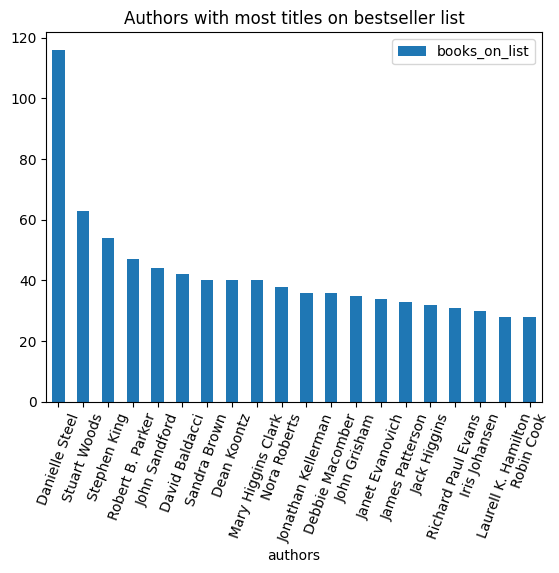

In [23]:
# Draw a vertical bar chart

new_df.plot.bar(x="authors", y="books_on_list", rot=70, title="Authors with most titles on bestseller list");

plot.show(block=True);

# LONGEST TENURED AUTHOR

match rows by author, find the greatest datediff of first weeks for authors

In [37]:
titles_df.groupby('author').max()[['first_week']]

,first_week
author,
Martha Grimes,1987-09-27
Elizabeth Forsythe Hailey,1986-04-27
James A. Michener,1987-11-08
Maxence van der Meersch,1937-02-08
! by Fannie Flagg,1998-10-11
...,...
written and illustrated by James Gurney,1992-12-27
written and illustrated by Jan Brett,1990-12-16
written and illustrated by Janet and Allan Ahlberg,1991-12-22


In [38]:
titles_df.groupby('author').min()[['first_week']]

,first_week
author,
Martha Grimes,1987-09-27
Elizabeth Forsythe Hailey,1986-04-27
James A. Michener,1987-11-08
Maxence van der Meersch,1937-02-08
! by Fannie Flagg,1998-10-11
...,...
written and illustrated by James Gurney,1992-12-27
written and illustrated by Jan Brett,1990-12-16
written and illustrated by Janet and Allan Ahlberg,1991-12-22


# AUTHOR WITH MOST WEEKS

(group by Author, ordered rank of sum total weeks)

https://data36.com/pandas-tutorial-2-aggregation-and-grouping/ 

https://sparkbyexamples.com/pandas/pandas-groupby-sum-examples/#:~:text=Pandas%20groupby()%20%26%20sum(),groupby(%5B'Courses'%5D). 

https://stackoverflow.com/questions/39922986/how-do-i-pandas-group-by-to-get-sum 

(cool graph opportunity where you stack the bars by legnth on a timeline)

In [31]:
titles_df.count()

 id            7431
title          7431
author         7427
year           7431
total_weeks    7431
first_week     7431
debut_rank     7431
best_rank      7431
dtype: int64

In [32]:
titles_df.total_weeks.sum()

60386

In [35]:
titles_df.groupby('author').sum()

<ipython-input-35-c9bc94582652>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  titles_df.groupby('author').sum()


,id,year,total_weeks,debut_rank,best_rank
author,,,,,
Martha Grimes,5157,1987,1,10,10
Elizabeth Forsythe Hailey,2493,1986,1,12,12
James A. Michener,2664,1987,1,13,13
Maxence van der Meersch,2444,1937,2,4,4
! by Fannie Flagg,7207,1998,11,15,4
...,...,...,...,...,...
written and illustrated by James Gurney,1460,1992,2,13,13
written and illustrated by Jan Brett,6702,1990,3,10,10
written and illustrated by Janet and Allan Ahlberg,5511,1991,5,5,5


In [39]:
most_weeks = titles_df.groupby('author').sum()[['total_weeks']]

<ipython-input-39-ced68516ea8b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  most_weeks = titles_df.groupby('author').sum()[['total_weeks']]


In [40]:
sorted_most_weeks=most_weeks.sort_values('total_weeks', ascending=False)
print(sorted_most_weeks)

                                                 total_weeks
author                                                      
Danielle Steel                                           957
Stephen King                                             892
John Grisham                                             789
Taylor Caldwell                                          524
James A. Michener                                        477
...                                                      ...
Lana Del Rey                                               1
Lara Adrian                                                1
Lars Kepler                                                1
Lauren Graham                                              1
written and illustrated by Mattie J.T. Stepanek            1

[2210 rows x 1 columns]


can maybe get fancy and look at time analysis of when they wrote